# Detection of Forest Fire
## Harjyot Singh Bagga (18BCE0694)

**Dataset Link:** https://archive.ics.uci.edu/ml/datasets/forest+fires  
**Problem Statement:** I used the above dataset, to predict whether a forest fire could occour or not.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Importing the dataset

df = pd.read_csv('./Data/LabFAT/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Getting information about the variables of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
# Dropping any n/a values in the dataset

df.dropna()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [5]:
# I dropped the day column, as I felt, it would not have a major impact on detecting if a forest fire would occour or not

del df['day']
df.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
# I label-encoded the Month column, so that it could be categorized by the classifier

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.month = le.fit_transform(df.month)
df.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
# Here I wanted to analyse the dataset, where I learnt that the dataset is biased towards 0, thus the model should be tweaked a little bit, in order to account for this bias.
# Also, here I decided to divide the area affected betn 0 and above 0, to label if a forest fire occoured or not

<AxesSubplot:>

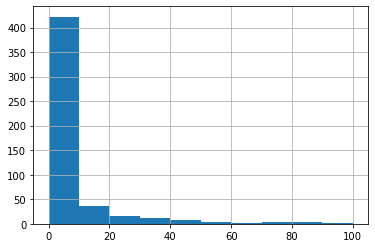

In [8]:
df['area'].hist(bins=10, range=[0,100])

<AxesSubplot:>

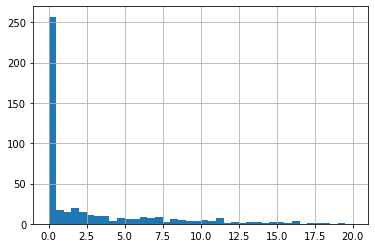

In [9]:
df['area'].hist(bins=40, range=[0,20])

In [10]:
# Making a division
# Area <= 0 -> No forest fire occoured
# Area > 0 -> Forest fire occoured

df.loc[df['area'] <= 0, 'forest_fire'] = 0
df.loc[df['area'] > 0, 'forest_fire'] = 1
del df['area']
df.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,forest_fire
0,7,5,7,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
# Breaking the dataset down to features (X) and labels (y)

X = df.iloc[:, 0:11].values    
y = df.iloc[:, 11].values

In [12]:
X[:5]

array([[7.000e+00, 5.000e+00, 7.000e+00, 8.620e+01, 2.620e+01, 9.430e+01,
        5.100e+00, 8.200e+00, 5.100e+01, 6.700e+00, 0.000e+00],
       [7.000e+00, 4.000e+00, 1.000e+01, 9.060e+01, 3.540e+01, 6.691e+02,
        6.700e+00, 1.800e+01, 3.300e+01, 9.000e-01, 0.000e+00],
       [7.000e+00, 4.000e+00, 1.000e+01, 9.060e+01, 4.370e+01, 6.869e+02,
        6.700e+00, 1.460e+01, 3.300e+01, 1.300e+00, 0.000e+00],
       [8.000e+00, 6.000e+00, 7.000e+00, 9.170e+01, 3.330e+01, 7.750e+01,
        9.000e+00, 8.300e+00, 9.700e+01, 4.000e+00, 2.000e-01],
       [8.000e+00, 6.000e+00, 7.000e+00, 8.930e+01, 5.130e+01, 1.022e+02,
        9.600e+00, 1.140e+01, 9.900e+01, 1.800e+00, 0.000e+00]])

In [13]:
y[:5]

array([0., 0., 0., 0., 0.])

In [14]:
# Split the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [15]:
# Standardized values apart from X, Y and month, so that we could get a more accurate classifier

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train[:, 3:11])
X_test_std = sc.transform(X_test[:, 3:11])

In [16]:
# Setting up the parameters of grid-search

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'C': param_range,
               'kernel': ['linear']},
               {'C': param_range,
                'gamma': param_range,
                'kernel': ['rbf']}]

In [17]:
# Using grid search to find the best hyper-params to work with

model = SVC()
clf = GridSearchCV(model, param_grid, scoring='accuracy')
clf.fit(X_train_std, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                1000.0],
                          'kernel': ['linear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                1000.0],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                    1000.0],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [18]:
# Getting the best params
print(clf.best_score_)
print(clf.best_params_)

0.5129032258064516
{'C': 0.0001, 'gamma': 0.1, 'kernel': 'rbf'}


In [19]:
# Using the best params to get the best training & testing accuracy

svm = SVC(kernel='rbf', gamma=10.0, C=100.0)
svm.fit(X_train_std, y_train)

# Score of SVM on the training data
print('SVM Training score: ', svm.score(X_train_std, y_train)*100)

SVM Training score:  98.06451612903226


In [20]:
# Score of SVM on testing data

print('SVM Validation score: ', svm.score(X_test_std, y_test)*100)

SVM Validation score:  56.038647342995176


### Future Work & Conclusions:
We have used SVM classifier to detect if a forest fire can occour based on our SVM Classifier. There are good chances that our model has overfit the training data, as the accuracy of the training data is extremely high unlike the testing/validation data.  
The accuracy of our SVM classifier is fairly low. The possible reasons could be: 
1. SVM classifier isn't the most appropriate classifier for this problem statement, other classifiers like Random Forest, Logistic Regression, etc can be used.
2. There is a clear bias in the dataset, further regularization methods should be applied in order to get the best results.